In [5]:
from qutip import*
import numpy as np 
from qutip.qip.operations import rx, ry
from tcsim.visualization import*

N = 100
vac = tensor(fock(2,0),fock(N,0))
Ic = qeye(N)
Iq = qeye(2)


In [6]:
uvs = [ 1.38744578,  0.51199234, -0.19874056, -0.46461027, -0.3244084,  -0.65943663]
uvs6 = [1.6, 0.39, -0.48, -1.04, -1.11, 0.32]
uvs7 = [-0.83, 0.56, 1.3, -0.56, -1.26, 0.39]

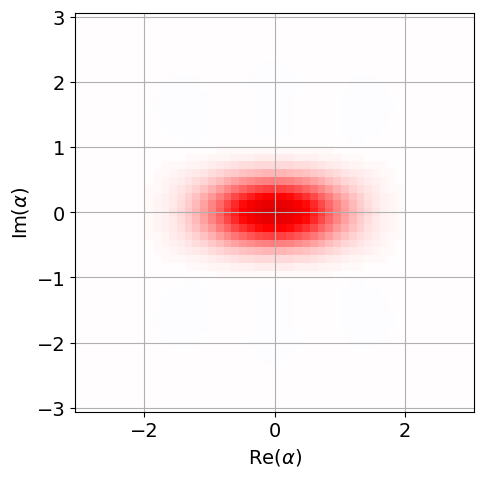

In [7]:
# ideal operator case
X = (a.dag()+a)/2
P = (1j*(a.dag()-a))/2

def Rx(phi):
    return tensor(rx(phi),Ic)
    
def Ry(phi):
    return tensor(ry(phi),Ic)
    

def U_ideal(beta):
    return Ry(np.pi/2)*(1j*(np.real(beta)*P*sz)).expm()*Ry(-np.pi/2)

    
def V_ideal(beta):
    return Rx(-np.pi/2)*(1j*(np.real(beta)*X*sz)).expm()*Rx(np.pi/2)

def squeeze_ideal(uvs):
    psi1 = V_ideal(uvs[1])*U_ideal(uvs[0])*vac
    psi2 = V_ideal(uvs[3])*U_ideal(uvs[2])*psi1
    psi3 = V_ideal(uvs[5])*U_ideal(uvs[4])*psi2
    return psi3



state = squeeze_ideal(uvs)
plot_wigner(state)

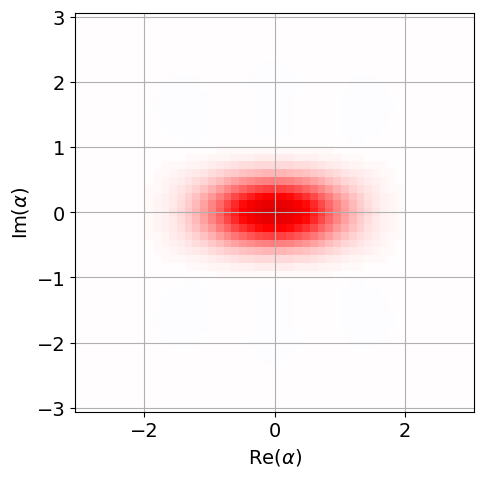

In [8]:
# with qubit Ry and Rx rotation, like in the code.
# ideal operator case
X = (a.dag()+a)/2
P = (1j*(a.dag()-a))/2

def U_ideal(beta):
    return Ry(-np.pi/2)*Ry(np.pi)*(1j*(np.real(beta)*P*sz)).expm()*Ry(-np.pi/2)
    
def V_ideal(beta):
    return Rx(np.pi/2)*Rx(np.pi)*(1j*(np.real(beta)*X*sz)).expm()*Rx(np.pi/2)

def squeeze_exp(uvs):
    psi1 = V_ideal(uvs[1])*U_ideal(uvs[0])*vac
    psi2 = V_ideal(uvs[3])*U_ideal(uvs[2])*psi1
    psi3 = V_ideal(uvs[5])*U_ideal(uvs[4])*psi2
    return psi3

state = squeeze_exp(uvs)
plot_wigner(state)

In [181]:
print(rx(np.pi))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]


In [182]:
print(ry(np.pi))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]


# experimental operations

In [9]:
Ic = qeye(N)

def ECDx(beta): 
    return 1j*(tensor(fock(2,0)*fock(2,1).dag(), displace(N,beta/2)) +  tensor(fock(2,1)*fock(2,0).dag(),displace(N,-beta/2)))

def ECDy(beta): 
    return tensor(fock(2,0)*fock(2,1).dag(), displace(N,beta/2)) -1*tensor(fock(2,1)*fock(2,0).dag(),displace(N,-beta/2))


def U(beta):
    return Ry(-np.pi/2)*ECDy(beta)*Ry(-np.pi/2)

def V(beta):
    return Rx(np.pi/2)*ECDx(1j*beta)*Rx(np.pi/2)


In [10]:
uvs = [ 1.38744578,  -0.51199234, -0.19874056, 0.46461027, -0.3244084,  0.65943663]
uvs6 = [1.6, -0.39, -0.48, 1.04, -1.11, -0.32]
uvs7 = [-0.83, -0.56, 1.3, 0.56, -1.26, -0.39]

In [11]:
def squeeze(uvs):
    psi1 = V(uvs[1])*U(uvs[0])*vac
    psi2 = V(uvs[3])*U(uvs[2])*psi1
    psi3 = V(uvs[5])*U(uvs[4])*psi2
    return psi3


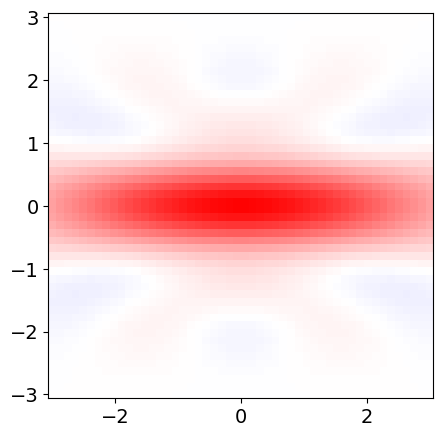

In [18]:
state = proj_g*squeeze(uvs7)
plot_char(state)

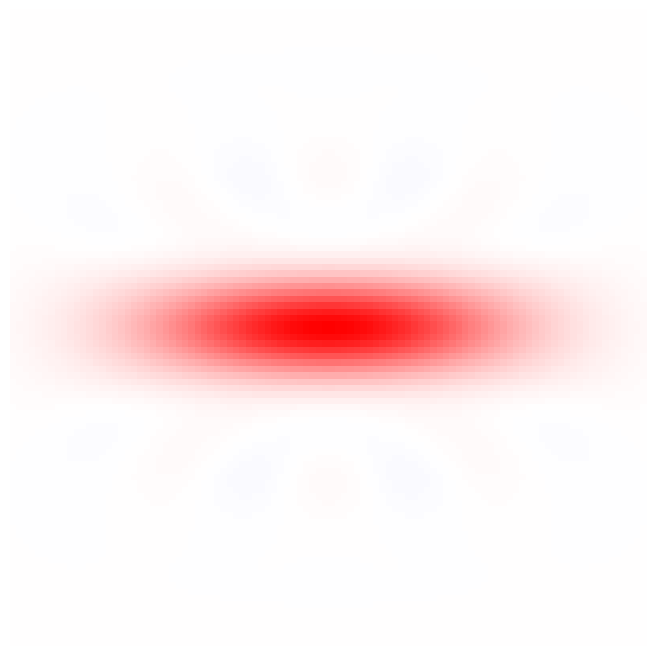

<Figure size 600x500 with 0 Axes>

In [20]:
state = squeeze(uvs6)
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_char(state, max_alpha = 5, npts = 100, ax = ax)
fig.savefig('uv_intuitiv_6.png', dpi=300, bbox_inches='tight')

In [29]:
state = tensor(Iq, displace(N,-1j))*vac

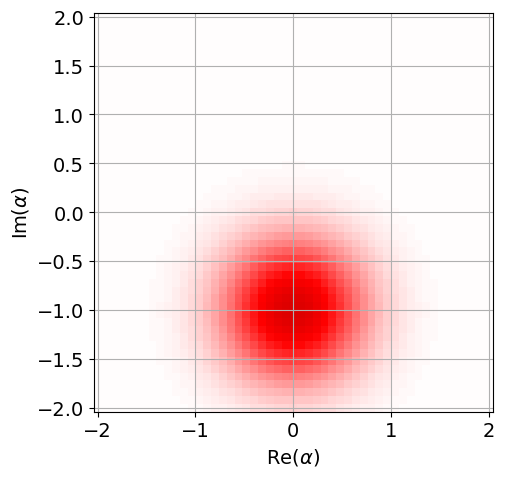

In [30]:
plot_wigner(state)